In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install verstack
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.5/230.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.2 MB/s eta 0:00:00
  Created wh

In [2]:
df = pd.read_csv('/kaggle/input/training-dataset/Dataset - Updated.csv')

In [3]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [4]:
df.isnull().sum()

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64

In [5]:
df2 = df.dropna(subset = ['Heart Rate','BS','Previous Complications','Preexisting Diabetes','Risk Level'])

In [6]:
df2.isnull().sum()

Age                        0
Systolic BP                4
Diastolic                  2
BS                         0
Body Temp                  0
BMI                       14
Previous Complications     0
Preexisting Diabetes       0
Gestational Diabetes       0
Mental Health              0
Heart Rate                 0
Risk Level                 0
dtype: int64

In [7]:
df2['Risk Level'] = pd.factorize(df2['Risk Level'])[0]

/tmp/ipykernel_13/1461596034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Risk Level'] = pd.factorize(df2['Risk Level'])[0]


In [8]:
df2.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,1
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,1
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,1
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,1


In [9]:
df2 = df2.copy() 
df2['Risk Level'] = df2['Risk Level'].apply(lambda col: 1 if col == 0 else 0)

In [10]:
X = df2.drop(['Risk Level'],axis = 1)
y = df2['Risk Level']

In [11]:
X.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0


In [12]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: Risk Level, Length: 1184, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state =1)

In [14]:
from verstack import NaNImputer

imputer = NaNImputer()
imputer = NaNImputer(train_sample_size = 50000,
                     verbose = False)

In [15]:
df_train = pd.concat([X_train,y_train],axis=1)

In [16]:
df_train_imputed = imputer.impute(df_train)

In [17]:
df_train_imputed.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
400,39,90.0,60.0,7.0,98,20.0,0.0,0.0,0,0,74.0,0
314,20,120.0,60.0,3.0,98,23.0,0.0,0.0,0,0,70.0,0
1150,22,110.0,60.0,5.9,98,24.7,1.0,1.0,0,1,81.0,1
1032,33,100.0,70.0,7.5,98,24.5,1.0,0.0,1,1,78.0,1
493,35,100.0,70.0,7.0,98,21.6,0.0,0.0,0,0,60.0,0


In [18]:
df_train_imputed.isnull().sum()

Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64

In [19]:
df_test = pd.concat([X_test,y_test],axis=1)

In [20]:
df_test_imputed = imputer.impute(df_test)

In [21]:
df_test_imputed.isnull().sum()

Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64

In [22]:
for col in df_train_imputed.columns:
    if (df_train_imputed[col] == 0).any():
        print(col)

BMI
Previous Complications
Preexisting Diabetes
Gestational Diabetes
Mental Health
Risk Level


In [23]:
df_train_imputed = df_train_imputed[df_train_imputed['BMI']>0]

In [24]:
X_train_imputed,y_train_imputed = df_train_imputed.drop(['Risk Level'],axis=1),df_train_imputed['Risk Level']

In [25]:
X_test_imputed,y_test_imputed = df_test_imputed.drop(['Risk Level'],axis=1),df_test_imputed['Risk Level']

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_imputed, y_train_imputed)

In [27]:
mi = pd.Series(mi)
mi.index = X_train_imputed.columns
mi.sort_values(ascending= False)

BMI                       0.434191
BS                        0.326750
Heart Rate                0.325651
Preexisting Diabetes      0.257183
Mental Health             0.227892
Previous Complications    0.163011
Gestational Diabetes      0.123841
Diastolic                 0.106281
Systolic BP               0.081203
Age                       0.048641
Body Temp                 0.012497
dtype: float64

In [28]:
X1 = df[df['Body Temp']>98]

In [29]:
X1.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
6,20,110.0,70.0,9.0,102,17.6,0.0,1.0,0,0,78.0,High
9,26,110.0,70.0,12.0,100,30.2,1.0,1.0,1,1,80.0,High
11,22,120.0,70.0,9.9,101,30.0,1.0,0.0,1,0,84.0,High
22,23,100.0,70.0,7.5,100,21.0,0.0,0.0,0,1,74.0,Low


In [30]:
X1 = X_train_imputed[X_train_imputed['Body Temp']>98]
X1.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
59,27,120.0,70.0,9.00,101,25.5,0.0,1.0,0,0,80.0
756,20,120.0,75.0,7.01,100,21.0,0.0,0.0,0,0,70.0
568,40,140.0,100.0,13.00,101,26.8,1.0,1.0,0,1,66.0
555,50,130.0,100.0,16.00,102,30.0,1.0,1.0,0,0,86.0
500,34,85.0,60.0,11.00,102,25.0,1.0,1.0,0,1,86.0


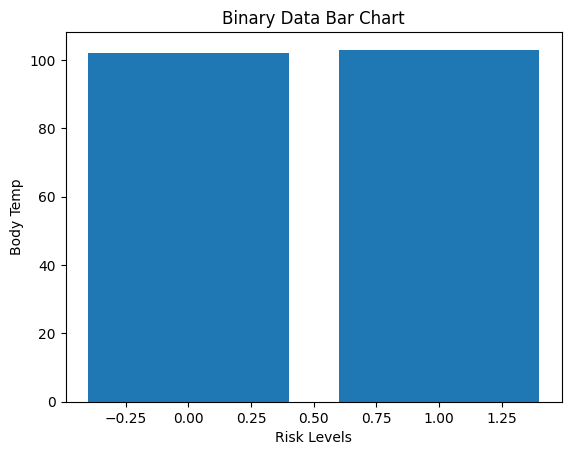

In [31]:
import matplotlib.pyplot as plt

categories = y_train
counts = X_train['Body Temp']

plt.bar(categories, counts)
plt.xlabel("Risk Levels")
plt.ylabel("Body Temp")
plt.title("Binary Data Bar Chart")
plt.show()

<Axes: >

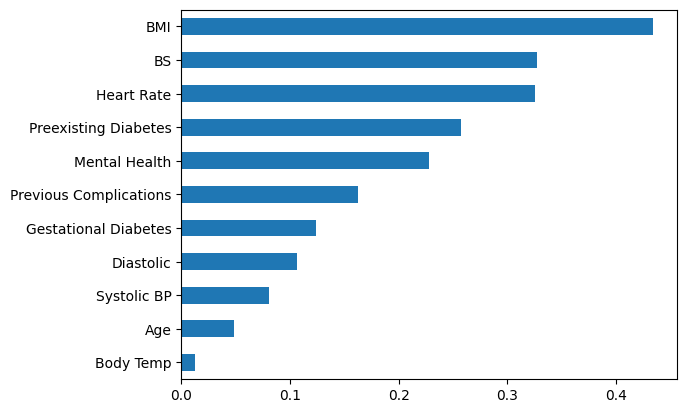

In [32]:
mi.sort_values(ascending=True).plot.barh()

In [33]:
X_train_imputed.pop('Body Temp')
X_test_imputed.pop('Body Temp')

393     98
1013    98
1020    98
659     98
602     98
        ..
657     98
177     98
943     98
597     98
1044    98
Name: Body Temp, Length: 296, dtype: int64

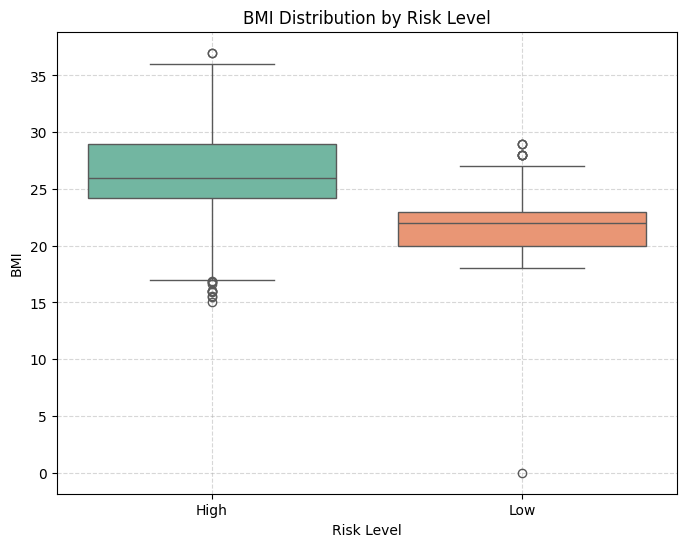

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk Level', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('BMI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Independance of BMI

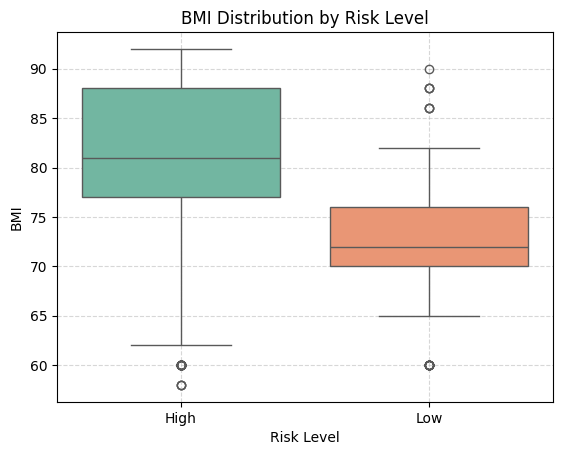

In [35]:
sns.boxplot(x='Risk Level', y='Heart Rate', data=df, palette='Set2')
plt.title('BMI Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('BMI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Good

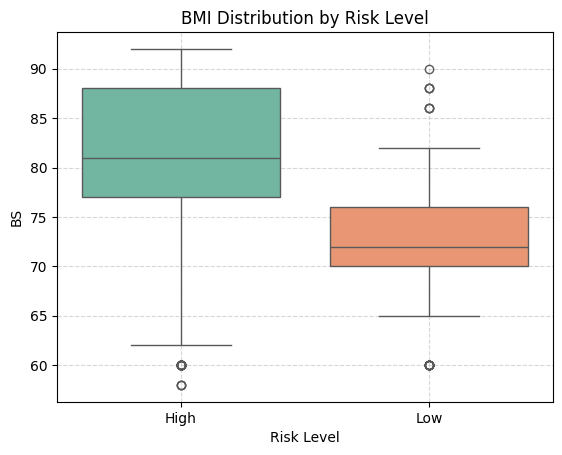

In [36]:
sns.boxplot(x='Risk Level', y='Heart Rate', data=df, palette='Set2')
plt.title('BMI Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('BS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [37]:
col = ['Previous Complications','Preexisting Diabetes','Gestational Diabetes','Mental Health']

In [38]:

X_flag_test_1 = X_train_imputed[col]
from sklearn.linear_model import LogisticRegression



In [39]:
model1 = LogisticRegression()
model1.fit(X_flag_test_1,y_train_imputed)

LogisticRegression()

In [40]:
X_train_imputed['Risk Score'] = model1.predict_proba(X_flag_test_1)[:,1]

In [41]:
X_train_imputed.head()

,Age,Systolic BP,Diastolic,BS,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Score
400,39,90.0,60.0,7.0,20.0,0.0,0.0,0,0,74.0,0.033474
314,20,120.0,60.0,3.0,23.0,0.0,0.0,0,0,70.0,0.033474
1150,22,110.0,60.0,5.9,24.7,1.0,1.0,0,1,81.0,0.995411
1032,33,100.0,70.0,7.5,24.5,1.0,0.0,1,1,78.0,0.997228
493,35,100.0,70.0,7.0,21.6,0.0,0.0,0,0,60.0,0.033474


In [42]:
X_train_imputed = X_train_imputed.drop(col,axis = 1)

In [43]:
cols = ['is_low_bmi', 'is_high_bmi', 'is_low_bp', 'is_high_bp', 'is_high_bs', 'is_high_hr', 'is_low_hr']

In [44]:
X_train_imputed['is_low_bmi'] = (X_train_imputed['BMI'] < 18.5).astype(int)
X_train_imputed['is_high_bmi'] = (X_train_imputed['BMI'] > 30).astype(int)
X_train_imputed['is_low_bp'] = ((X_train_imputed['Systolic BP'] < 90) | (X_train_imputed['Diastolic'] < 60)).astype(int)
X_train_imputed['is_high_bp'] = ((X_train_imputed['Systolic BP'] > 140) | (X_train_imputed['Diastolic'] > 90)).astype(int)
X_train_imputed['is_high_bs'] = (X_train_imputed['BS'] > 140).astype(int)
X_train_imputed['is_high_hr'] = (X_train_imputed['Heart Rate'] > 100).astype(int)
X_train_imputed['is_low_hr'] = (X_train_imputed['Heart Rate'] < 60).astype(int)

X_flags_2 = X_train_imputed[cols]

In [45]:
(X_train_imputed['BMI']<18.5).sum()

53

In [46]:
(X_flags_2['is_low_bmi']>0).sum()

53

In [47]:
model2 = LogisticRegression()
model2.fit(X_flags_2, y_train_imputed)

LogisticRegression()

In [48]:
X_train_imputed['Risk Score Abn'] = model2.predict_proba(X_flags_2)[:,1]

In [49]:
X_train_imputed = X_train_imputed.drop(cols,axis = 1)

In [50]:
X_train_imputed

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate,Risk Score,Risk Score Abn
400,39,90.0,60.0,7.0,20.0,74.0,0.033474,0.272247
314,20,120.0,60.0,3.0,23.0,70.0,0.033474,0.272247
1150,22,110.0,60.0,5.9,24.7,81.0,0.995411,0.272247
1032,33,100.0,70.0,7.5,24.5,78.0,0.997228,0.272247
493,35,100.0,70.0,7.0,21.6,60.0,0.033474,0.272247
...,...,...,...,...,...,...,...,...
724,29,130.0,70.0,6.5,22.0,78.0,0.033474,0.272247
919,20,90.0,60.0,7.5,23.0,74.0,0.033474,0.272247
1116,29,110.0,80.0,11.0,24.1,84.0,0.956683,0.272247
240,31,100.0,60.0,6.6,19.0,76.0,0.033474,0.272247


In [51]:
X_ult_flag = X_train_imputed[['Risk Score','Risk Score Abn']]

In [52]:
model3 = LogisticRegression()
model3.fit(X_ult_flag,y_train_imputed)

LogisticRegression()

In [53]:
X_train_imputed['Final_Risk_Score'] = model3.predict_proba(X_ult_flag)[:, 1]

In [54]:
X_train_imputed

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate,Risk Score,Risk Score Abn,Final_Risk_Score
400,39,90.0,60.0,7.0,20.0,74.0,0.033474,0.272247,0.029296
314,20,120.0,60.0,3.0,23.0,70.0,0.033474,0.272247,0.029296
1150,22,110.0,60.0,5.9,24.7,81.0,0.995411,0.272247,0.948752
1032,33,100.0,70.0,7.5,24.5,78.0,0.997228,0.272247,0.949338
493,35,100.0,70.0,7.0,21.6,60.0,0.033474,0.272247,0.029296
...,...,...,...,...,...,...,...,...,...
724,29,130.0,70.0,6.5,22.0,78.0,0.033474,0.272247,0.029296
919,20,90.0,60.0,7.5,23.0,74.0,0.033474,0.272247,0.029296
1116,29,110.0,80.0,11.0,24.1,84.0,0.956683,0.272247,0.934627
240,31,100.0,60.0,6.6,19.0,76.0,0.033474,0.272247,0.029296


In [55]:
X_train_imputed[['BS', 'BMI', 'Age', 'Heart Rate','Systolic BP','Diastolic', 'Final_Risk_Score']].describe()

,BS,BMI,Age,Heart Rate,Systolic BP,Diastolic,Final_Risk_Score
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,7.476099,23.399131,27.067644,75.872604,116.611048,77.072153,0.401369
std,3.029858,3.795297,8.946035,7.229439,18.416513,14.206848,0.439810
min,3.000000,15.500000,12.000000,58.000000,70.000000,40.000000,0.029296
25%,6.000000,21.000000,21.000000,70.000000,100.000000,65.000000,0.029296
50%,6.900000,23.000000,25.000000,76.000000,120.000000,80.000000,0.100848
75%,8.000000,25.000000,31.000000,80.000000,130.000000,90.000000,0.941131
max,19.000000,37.000000,65.000000,92.000000,180.000000,130.000000,0.993365


In [56]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Age','Systolic BP','Diastolic','BS','BMI','Heart Rate']
scaler = StandardScaler()

X_train_imputed_scaled = scaler.fit_transform(X_train_imputed[features_to_scale])
X_test_imputed_scaled = scaler.transform(X_test_imputed[features_to_scale])

In [57]:
X_train_imputed_scaled_df = pd.DataFrame(X_train_imputed_scaled, columns=features_to_scale)
X_test_imputed_scaled_df = pd.DataFrame(X_test_imputed_scaled, columns=features_to_scale)

In [58]:
X_train_imputed_scaled_df

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate
0,1.334568,-1.445771,-1.202363,-0.157224,-0.896122,-0.259171
1,-0.790477,0.184121,-1.202363,-1.478163,-0.105224,-0.812776
2,-0.566788,-0.359176,-1.202363,-0.520483,0.342951,0.709639
3,0.663501,-0.902474,-0.498080,0.007893,0.290225,0.294434
4,0.887190,-0.902474,-0.498080,-0.157224,-0.474310,-2.196790
...,...,...,...,...,...,...
882,0.216123,0.727418,-0.498080,-0.322342,-0.368857,0.294434
883,-0.790477,-1.445771,-1.202363,0.007893,-0.105224,-0.259171
884,0.216123,-0.359176,0.206203,1.163714,0.184772,1.124843
885,0.439812,-0.902474,-1.202363,-0.289318,-1.159755,0.017632


In [59]:
X_train_imputed['Final_Risk_Score']

400     0.029296
314     0.029296
1150    0.948752
1032    0.949338
493     0.029296
          ...   
724     0.029296
919     0.029296
1116    0.934627
240     0.029296
1081    0.777991
Name: Final_Risk_Score, Length: 887, dtype: float64

In [60]:
X_train_imputed_scaled_final = pd.concat([X_train_imputed_scaled_df,X_train_imputed['Final_Risk_Score'].reset_index(drop=True)],axis=1)

In [61]:
X_train_imputed_scaled_final

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate,Final_Risk_Score
0,1.334568,-1.445771,-1.202363,-0.157224,-0.896122,-0.259171,0.029296
1,-0.790477,0.184121,-1.202363,-1.478163,-0.105224,-0.812776,0.029296
2,-0.566788,-0.359176,-1.202363,-0.520483,0.342951,0.709639,0.948752
3,0.663501,-0.902474,-0.498080,0.007893,0.290225,0.294434,0.949338
4,0.887190,-0.902474,-0.498080,-0.157224,-0.474310,-2.196790,0.029296
...,...,...,...,...,...,...,...
882,0.216123,0.727418,-0.498080,-0.322342,-0.368857,0.294434,0.029296
883,-0.790477,-1.445771,-1.202363,0.007893,-0.105224,-0.259171,0.029296
884,0.216123,-0.359176,0.206203,1.163714,0.184772,1.124843,0.934627
885,0.439812,-0.902474,-1.202363,-0.289318,-1.159755,0.017632,0.029296


In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models

2025-05-31 18:44:04.779316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748717045.013938      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748717045.081334      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [63]:
model = models.Sequential([
    layers.Input(shape=(7,)),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(8,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.fit(X_train_imputed_scaled_final, y_train_imputed, epochs=50, batch_size=32, validation_split=0.2)
    

Epoch 1/50


2025-05-31 18:44:19.260011: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3752 - auc: 0.6635 - loss: 0.6912 - val_accuracy: 0.5000 - val_auc: 0.7758 - val_loss: 0.6547
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5636 - auc: 0.8161 - loss: 0.6479 - val_accuracy: 0.7360 - val_auc: 0.9395 - val_loss: 0.6138
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7669 - auc: 0.9126 - loss: 0.6155 - val_accuracy: 0.8371 - val_auc: 0.9528 - val_loss: 0.5772
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8451 - auc: 0.9516 - loss: 0.5729 - val_accuracy: 0.8989 - val_auc: 0.9458 - val_loss: 0.5322
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8822 - auc: 0.9570 - loss: 0.5236 - val_accuracy: 0.9045 - val_auc: 0.9435 - val_loss: 0.4879
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8960 - auc: 0.9539 - loss: 0.4765 - val_accuracy: 0.9270 - val_auc: 0.9402 - val_loss: 0.4445
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 

In [64]:
X_test_imputed_scaled

array([[ 0.55165659,  0.45576946, -0.14593824, -0.19024794, -0.10522405,
        -0.25917097],
       [-0.90232104, -2.26071699, -2.25878736, -0.65257651, -1.68702004,
        -1.36638181],
       [-1.1260099 , -0.90247376, -1.2023628 , -0.91676426, -2.05610577,
         0.29443445],
       ...,
       [-0.45494331, -0.90247376, -1.2023628 , -0.9828112 , -1.10702818,
        -0.81277639],
       [ 0.88718989,  0.18412082, -1.2023628 , -0.4544357 , -0.36885671,
         0.01763174],
       [ 1.89378978,  0.18412082,  0.20620328,  2.48465305,  3.05836794,
        -0.81277639]])

In [65]:
X_test_imputed_scaled_df = pd.DataFrame(X_test_imputed_scaled, columns=features_to_scale)

In [66]:
X_test_imputed_scaled_df

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate
0,0.551657,0.455769,-0.145938,-0.190248,-0.105224,-0.259171
1,-0.902321,-2.260717,-2.258787,-0.652577,-1.687020,-1.366382
2,-1.126010,-0.902474,-1.202363,-0.916764,-2.056106,0.294434
3,3.124079,0.184121,0.910486,-0.157224,-0.632489,-0.812776
4,1.670101,0.727418,0.206203,3.475357,1.476572,0.294434
...,...,...,...,...,...,...
291,-0.454943,0.727418,-0.498080,-0.190248,-1.159755,-0.812776
292,-0.566788,1.270715,-0.498080,-0.157224,0.949307,1.678448
293,-0.454943,-0.902474,-1.202363,-0.982811,-1.107028,-0.812776
294,0.887190,0.184121,-1.202363,-0.454436,-0.368857,0.017632


In [67]:
X_test_imputed.head()

,Age,Systolic BP,Diastolic,BS,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
393,32,125.0,75.0,6.9,23.0,0.0,0.0,0,1,74.0
1013,19,75.0,45.0,5.5,17.0,1.0,0.0,1,1,66.0
1020,17,100.0,60.0,4.7,15.6,0.0,0.0,1,1,78.0
659,55,120.0,90.0,7.0,21.0,0.0,0.0,0,0,70.0
602,42,130.0,80.0,18.0,29.0,0.0,1.0,0,1,78.0


In [68]:
X_test_flag_1 = X_test_imputed[col]

In [69]:
X_test_imputed['Risk Score'] = model1.predict_proba(X_test_flag_1)[:,1]

In [70]:
X_test_imputed

,Age,Systolic BP,Diastolic,BS,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Score
393,32,125.0,75.0,6.9,23.0,0.0,0.0,0,1,74.0,0.230196
1013,19,75.0,45.0,5.5,17.0,1.0,0.0,1,1,66.0,0.997228
1020,17,100.0,60.0,4.7,15.6,0.0,0.0,1,1,78.0,0.973425
659,55,120.0,90.0,7.0,21.0,0.0,0.0,0,0,70.0,0.033474
602,42,130.0,80.0,18.0,29.0,0.0,1.0,0,1,78.0,0.956683
...,...,...,...,...,...,...,...,...,...,...,...
657,23,130.0,70.0,6.9,19.0,0.0,0.0,0,0,70.0,0.033474
177,22,140.0,70.0,7.0,27.0,0.0,0.0,0,1,88.0,0.230196
943,23,100.0,60.0,4.5,19.2,0.0,0.0,0,0,70.0,0.033474
597,35,120.0,60.0,6.1,22.0,0.0,0.0,0,0,76.0,0.033474


In [71]:
cols

['is_low_bmi',
 'is_high_bmi',
 'is_low_bp',
 'is_high_bp',
 'is_high_bs',
 'is_high_hr',
 'is_low_hr']

In [72]:
X_test_imputed['is_low_bmi'] = (X_test_imputed['BMI'] < 18.5).astype(int)
X_test_imputed['is_high_bmi'] = (X_test_imputed['BMI'] > 30).astype(int)
X_test_imputed['is_low_bp'] = ((X_test_imputed['Systolic BP'] < 90) | (X_test_imputed['Diastolic'] < 60)).astype(int)
X_test_imputed['is_high_bp'] = ((X_test_imputed['Systolic BP'] > 140) | (X_test_imputed['Diastolic'] > 90)).astype(int)
X_test_imputed['is_high_bs'] = (X_test_imputed['BS'] > 140).astype(int)
X_test_imputed['is_high_hr'] = (X_test_imputed['Heart Rate'] > 100).astype(int)
X_test_imputed['is_low_hr'] = (X_test_imputed['Heart Rate'] < 60).astype(int)

X_test_flags_2 = X_test_imputed[cols]

In [73]:
X_test_imputed['Risk Score Abn'] = model2.predict_proba(X_test_flags_2)[:,1]

In [74]:
X_test_imputed.head()

,Age,Systolic BP,Diastolic,BS,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Score,is_low_bmi,is_high_bmi,is_low_bp,is_high_bp,is_high_bs,is_high_hr,is_low_hr,Risk Score Abn
393,32,125.0,75.0,6.9,23.0,0.0,0.0,0,1,74.0,0.230196,0,0,0,0,0,0,0,0.272247
1013,19,75.0,45.0,5.5,17.0,1.0,0.0,1,1,66.0,0.997228,1,0,1,0,0,0,0,0.863633
1020,17,100.0,60.0,4.7,15.6,0.0,0.0,1,1,78.0,0.973425,1,0,0,0,0,0,0,0.848629
659,55,120.0,90.0,7.0,21.0,0.0,0.0,0,0,70.0,0.033474,0,0,0,0,0,0,0,0.272247
602,42,130.0,80.0,18.0,29.0,0.0,1.0,0,1,78.0,0.956683,0,0,0,0,0,0,0,0.272247


In [75]:
X_flag_test_final = X_test_imputed[['Risk Score','Risk Score Abn']]

In [76]:
X_test_imputed['Final_Risk_Score'] = model3.predict_proba(X_flag_test_final)[:,1]

In [77]:
X_test_imputed.head()

,Age,Systolic BP,Diastolic,BS,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Score,is_low_bmi,is_high_bmi,is_low_bp,is_high_bp,is_high_bs,is_high_hr,is_low_hr,Risk Score Abn,Final_Risk_Score
393,32,125.0,75.0,6.9,23.0,0.0,0.0,0,1,74.0,0.230196,0,0,0,0,0,0,0,0.272247,0.100848
1013,19,75.0,45.0,5.5,17.0,1.0,0.0,1,1,66.0,0.997228,1,0,1,0,0,0,0,0.863633,0.990450
1020,17,100.0,60.0,4.7,15.6,0.0,0.0,1,1,78.0,0.973425,1,0,0,0,0,0,0,0.848629,0.988334
659,55,120.0,90.0,7.0,21.0,0.0,0.0,0,0,70.0,0.033474,0,0,0,0,0,0,0,0.272247,0.029296
602,42,130.0,80.0,18.0,29.0,0.0,1.0,0,1,78.0,0.956683,0,0,0,0,0,0,0,0.272247,0.934627


In [78]:
X_test_imputed_scaled_final = pd.concat([X_test_imputed_scaled_df,X_test_imputed['Final_Risk_Score'].reset_index(drop=True)],axis=1)

In [79]:
X_test_imputed_scaled_final

,Age,Systolic BP,Diastolic,BS,BMI,Heart Rate,Final_Risk_Score
0,0.551657,0.455769,-0.145938,-0.190248,-0.105224,-0.259171,0.100848
1,-0.902321,-2.260717,-2.258787,-0.652577,-1.687020,-1.366382,0.990450
2,-1.126010,-0.902474,-1.202363,-0.916764,-2.056106,0.294434,0.988334
3,3.124079,0.184121,0.910486,-0.157224,-0.632489,-0.812776,0.029296
4,1.670101,0.727418,0.206203,3.475357,1.476572,0.294434,0.934627
...,...,...,...,...,...,...,...
291,-0.454943,0.727418,-0.498080,-0.190248,-1.159755,-0.812776,0.029296
292,-0.566788,1.270715,-0.498080,-0.157224,0.949307,1.678448,0.100848
293,-0.454943,-0.902474,-1.202363,-0.982811,-1.107028,-0.812776,0.029296
294,0.887190,0.184121,-1.202363,-0.454436,-0.368857,0.017632,0.029296


In [80]:
y_predicted = model.predict(X_test_imputed_scaled_final)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [81]:
y_pred = (y_predicted >= 0.5).astype(int)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


print("Accuracy:", accuracy_score(y_test_imputed, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test_imputed, y_pred))


print("Classification Report:\n", classification_report(y_test_imputed, y_pred))


print("AUC Score:", roc_auc_score(y_test_imputed, y_pred))

Accuracy: 0.9628378378378378
Confusion Matrix:
 [[173   8]
 [  3 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.93      0.97      0.95       115

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

AUC Score: 0.9648570742253184


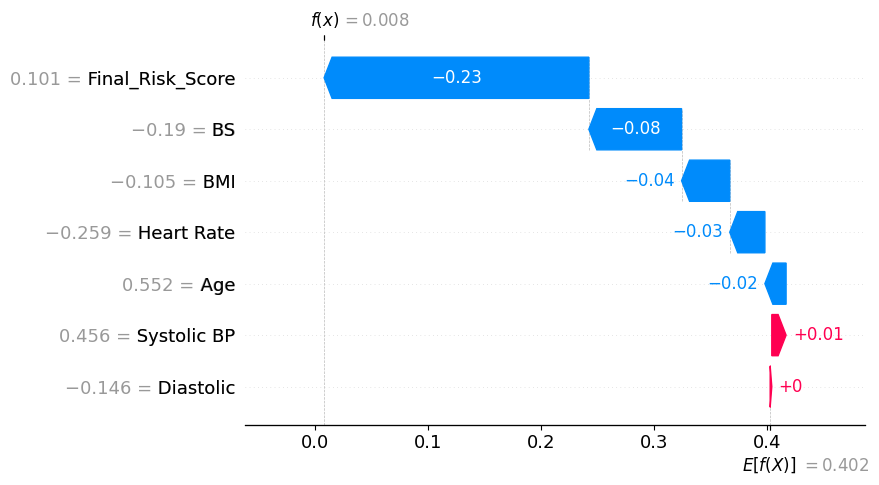

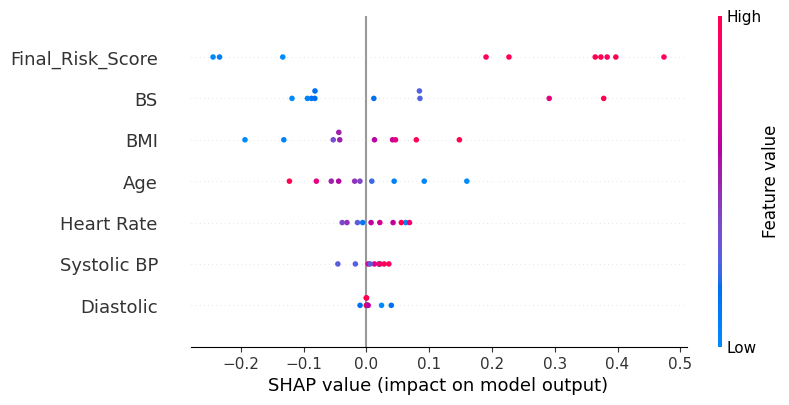

In [83]:
import shap
explainer = shap.Explainer(model, X_train_imputed_scaled_final[:100])

shap_values = explainer(X_test_imputed_scaled_final[:10])

shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)

In [84]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp2_76o6p1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131951660708112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131951660709264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131951660704080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131951660705424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131951660709840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131951660707536: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1748717086.966746      13 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748717086.966825      13 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1748717086.972335      13 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [85]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)